In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
horse_images = []
for path in os.listdir('D:/School/Applied ML FSU/Applied-ML-FSU/Data/Horses'):
    img = cv2.imread('D:/School/Applied ML FSU/Applied-ML-FSU/Data/Horses/' + path, cv2.IMREAD_GRAYSCALE)
    horse_images.append(img)

bird_image = cv2.imread('D:/School/Applied ML FSU/Applied-ML-FSU/Data/bird128.png', cv2.IMREAD_GRAYSCALE)
horse_images_flat = np.array([img.flatten() for img in horse_images])
bird_image_flat = bird_image.flatten()

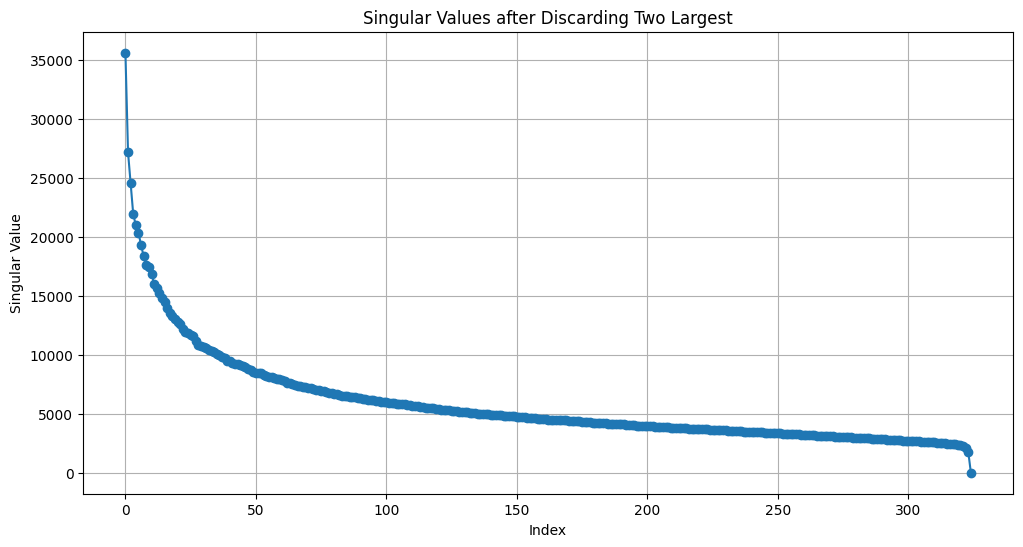

In [3]:
mean_horse = np.mean(horse_images_flat, axis=0)
centered_horses = horse_images_flat - mean_horse

U, S, Vt = np.linalg.svd(centered_horses, full_matrices=False)

S = np.delete(S, obj = [0,1], axis = 0)

plt.figure(figsize=(12, 6))
plt.plot(S, marker='o')
plt.title('Singular Values after Discarding Two Largest')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

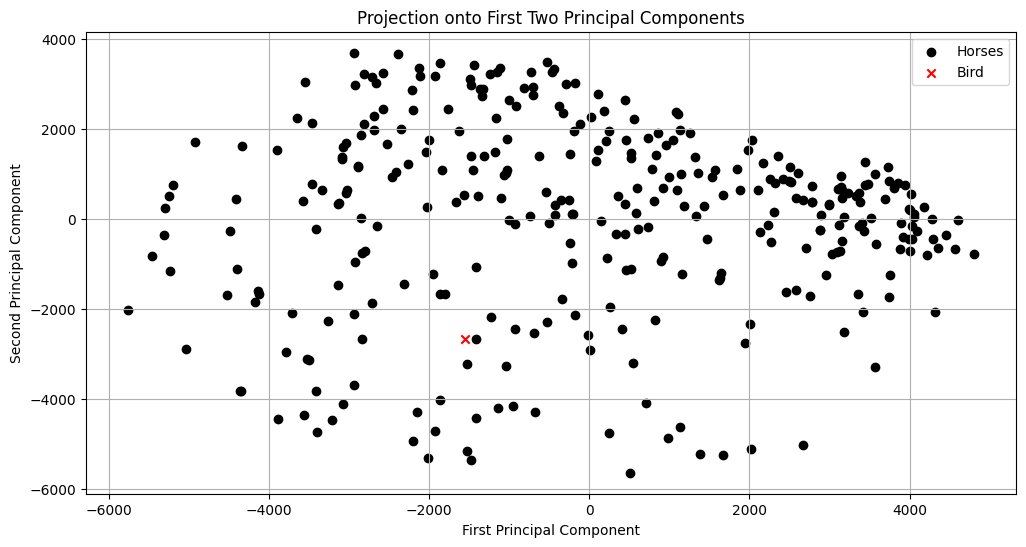

In [4]:
projection = np.dot(centered_horses, Vt[:2, :].T)
centered_bird = bird_image_flat - mean_horse
projection_bird = np.dot(centered_bird, Vt[:2, :].T)

plt.figure(figsize=(12, 6))
plt.scatter(projection[:, 0], projection[:, 1], color='black', label='Horses')
plt.scatter(projection_bird[0], projection_bird[1], color='red', marker='x', label='Bird')
plt.title('Projection onto First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()

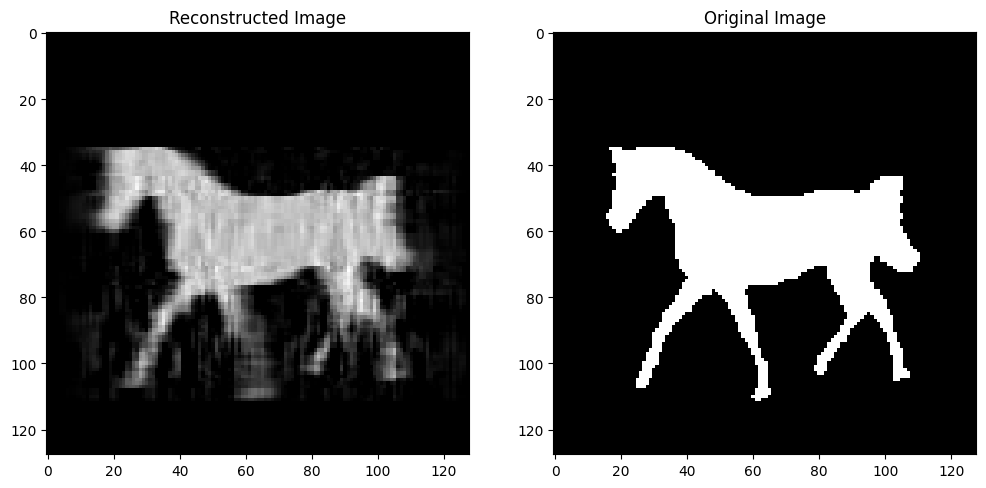

In [5]:
#https://analyticsindiamag.com/guide-to-image-reconstruction-using-principal-component-analysis/

ipca = IncrementalPCA(n_components=20)
fitted = ipca.fit(mean_horse.reshape(128,128))
transformed = ipca.transform(horse_images[59])
reconstructed = np.where(ipca.inverse_transform(transformed) > 0.5, ipca.inverse_transform(transformed), 0)

plt.figure(figsize=[12,8])

plt.subplot(1,2,1)
plt.imshow(reconstructed,cmap = plt.cm.gray)
plt.title('Reconstructed Image')

plt.subplot(1,2,2)
plt.imshow(horse_images[59], cmap = plt.cm.gray)
plt.title('Original Image')

plt.show()

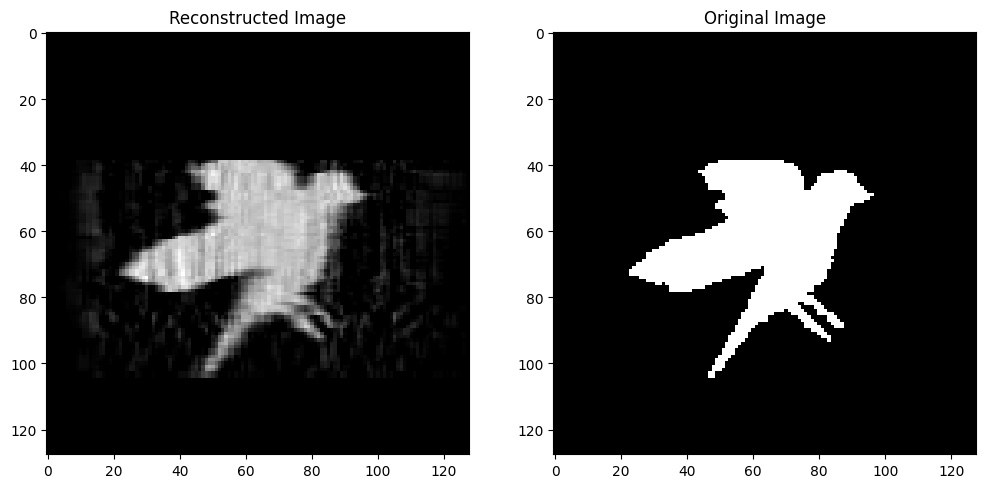

In [6]:
ipca = IncrementalPCA(n_components=20)
fitted = ipca.fit(mean_horse.reshape(128,128))
transformed = ipca.transform(bird_image)
reconstructed = np.where(ipca.inverse_transform(transformed) > 0.5, ipca.inverse_transform(transformed), 0)

plt.figure(figsize=[12,8])

plt.subplot(1,2,1)
plt.imshow(reconstructed,cmap = plt.cm.gray)
plt.title('Reconstructed Image')

plt.subplot(1,2,2)
plt.imshow(bird_image, cmap = plt.cm.gray)
plt.title('Original Image')
plt.show()

plt.show()

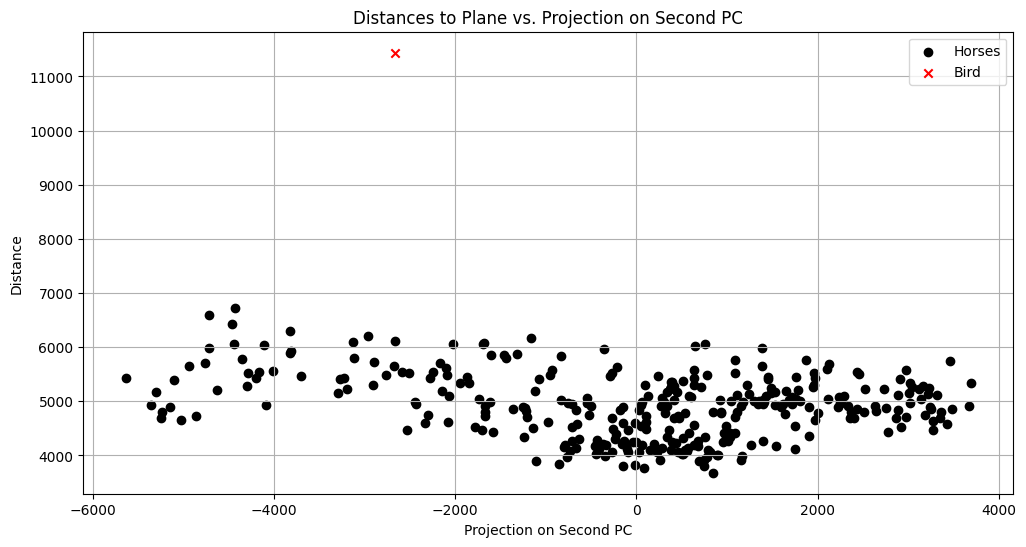

In [7]:
proj32 = np.dot(centered_horses, Vt[:32, :].T)
distance_horses = np.linalg.norm(centered_horses - np.dot(proj32, Vt[:32, :]), axis=1)
distance_bird = np.linalg.norm(centered_bird - np.dot(proj32, Vt[:32, :]), axis=1)

plt.figure(figsize=(12, 6))
plt.scatter(proj32[:, 1], distance_horses, color='black', label='Horses')
plt.scatter(projection_bird[1], np.linalg.norm(centered_bird - np.dot(proj32[0], Vt[:32, :]), axis=0), color='red', marker='x', label='Bird')
plt.title('Distances to Plane vs. Projection on Second PC')
plt.xlabel('Projection on Second PC')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()

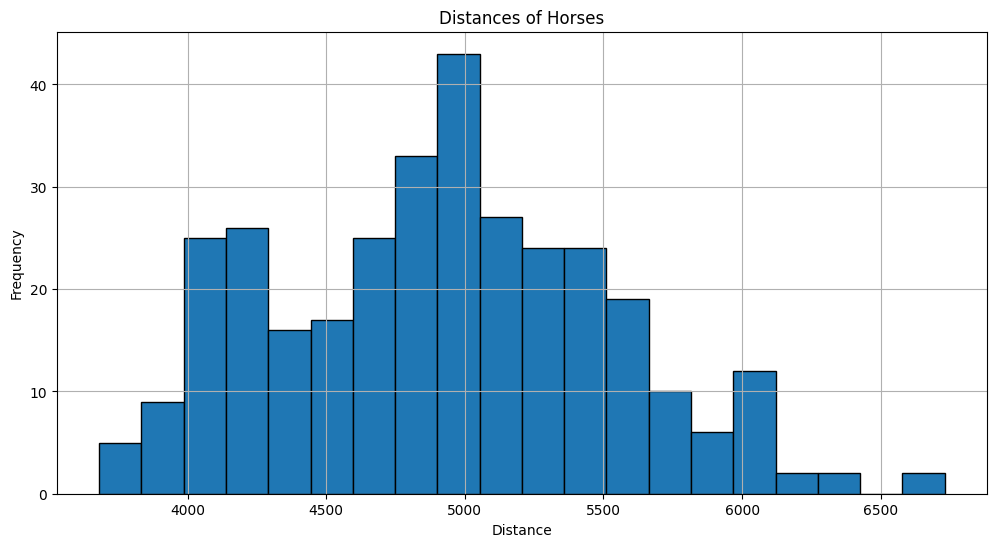

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(distance_horses, bins=20, edgecolor= 'black')
plt.title('Distances of Horses')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()